<a href="https://colab.research.google.com/github/dennkitotaichi/CE_PLUS/blob/patch-1/LightGBMtukuttemita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving testTotal2019.csv to testTotal2019.csv


In [4]:
import pandas as pd

dt = pd.read_csv('testTotal2019.csv')
print(dt)
df = pd.DataFrame(dt)
print(df)

     Unnamed: 0  ...  Average cloud volume (10 pct)
0      2016/9/1  ...                            4.3
1      2016/9/2  ...                            9.5
2      2016/9/3  ...                           10.0
3      2016/9/4  ...                           10.0
4      2016/9/5  ...                            8.3
...         ...  ...                            ...
1090  2019/8/27  ...                            3.8
1091  2019/8/28  ...                           10.0
1092  2019/8/29  ...                           10.0
1093  2019/8/30  ...                            7.8
1094  2019/8/31  ...                            6.3

[1095 rows x 24 columns]
     Unnamed: 0  ...  Average cloud volume (10 pct)
0      2016/9/1  ...                            4.3
1      2016/9/2  ...                            9.5
2      2016/9/3  ...                           10.0
3      2016/9/4  ...                           10.0
4      2016/9/5  ...                            8.3
...         ...  ...                  

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set()
import collections
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')



Using TensorFlow backend.


Index(['Unnamed: 0', 'total', 'man', 'woman', 'kokyuuki', 'sinndennzu',
       'sirinnji', 'kaitouOP', 'kaikyouOP', 'kaifukuOP', 'honenoOP',
       'fukukuukyou', 'elseOP', 'Average temperature (C)',
       'Lowest temperature ?', 'Maximum temperature ?',
       'Total precipitation (mm)', 'Daylight Hours (Hours)',
       'Deepest Snow (cm)', 'Total snowfall (cm)', 'Total snowfall (cm).1',
       'Minimum relative humidity (%)', 'Average local pressure (hPa)',
       'Average cloud volume (10 pct)'],
      dtype='object')
Index(['Unnamed: 0'], dtype='object')
      total  man  ...  Average local pressure (hPa)  Average cloud volume (10 pct)
0       165   90  ...                        1006.6                            4.3
1       161   87  ...                        1012.7                            9.5
2       156   80  ...                        1015.2                           10.0
3       156   78  ...                        1015.4                           10.0
4       171   84  .

ValueError: ignored

<Figure size 1440x1080 with 0 Axes>

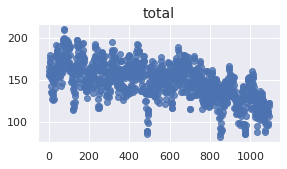

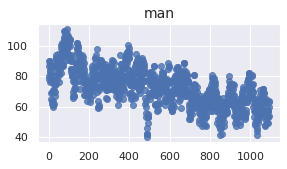

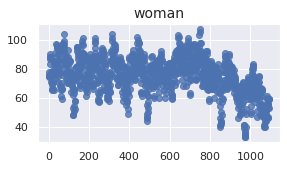

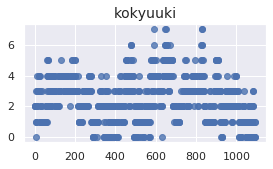

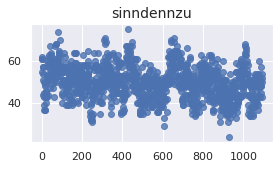

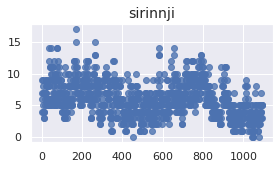

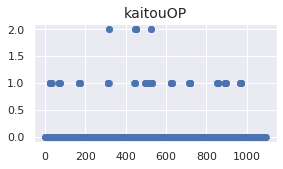

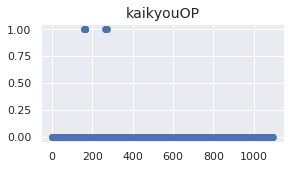

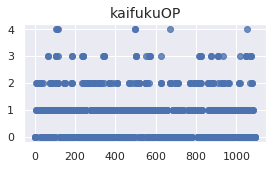

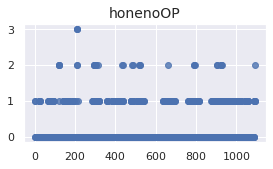

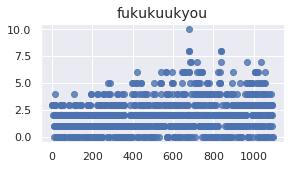

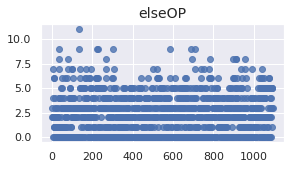

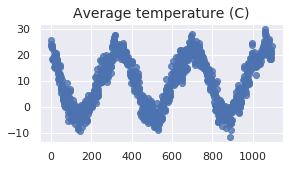

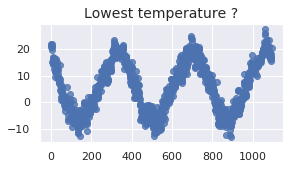

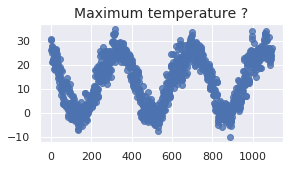

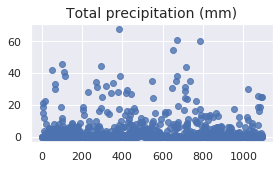

<Figure size 1440x720 with 0 Axes>

In [6]:
print(df.columns)
print(df.columns[[0]])
print(df.drop(df.columns[[0]], axis=1))
dtt=df.drop(df.columns[[0]], axis=1)


def data_plot(data):
    plt.figure(figsize=(20,15))
    plt.tight_layout()
    plt.suptitle("Feature Plot",fontsize=20)
    plt.subplots_adjust(top=0.93)
    for i in range(len(data.columns)):
        plt.figure(figsize=(20,10))
        plt.subplot(4,4,i+1)
        plt.plot(data.iloc[:,i:i+1],linestyle="None",marker="o",alpha=0.8)
        plt.title(data.columns[i],fontsize=14)    



data_plot(dtt)

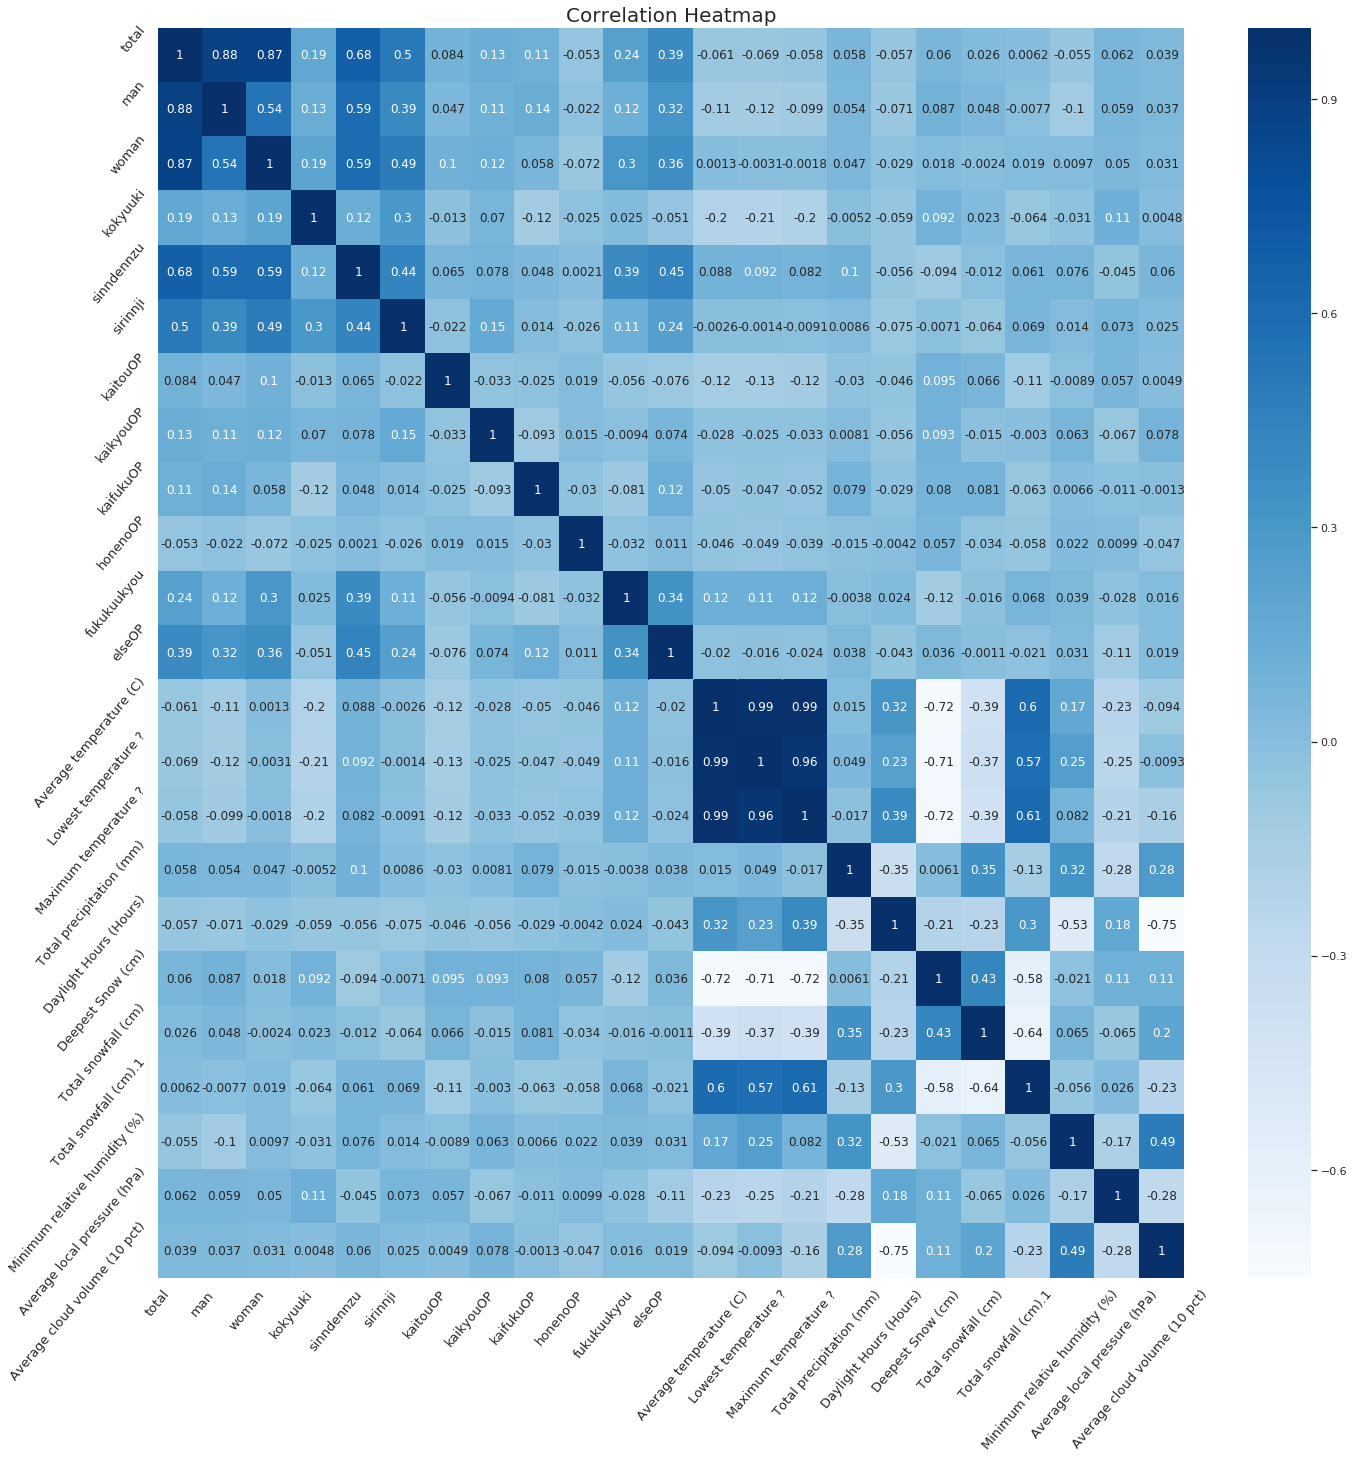

In [7]:
def correlatio_heatmap(data):#numpy.corrcoefで相関係数を見れる
    corr = np.corrcoef(data.T)
    columns = data.columns
    tick = np.arange(0,23)
    plt.figure(figsize=(23,23))
    sns.heatmap(corr,annot=True,cmap="Blues")
    plt.title("Correlation Heatmap",fontsize=20)
    plt.yticks(tick,columns,rotation=50, fontsize=13)
    plt.xticks(tick,columns,rotation=50, fontsize=13)

correlatio_heatmap(dtt)

          total  ...  Average cloud volume (10 pct)
kokyuuki         ...                               
0         11567  ...                          662.4
1         35161  ...                         1823.1
2         38687  ...                         1835.5
3         38914  ...                         1907.1
4         25429  ...                         1261.0
5          9547  ...                          447.4
6          2127  ...                          122.5
7           757  ...                           39.5

[8 rows x 22 columns]


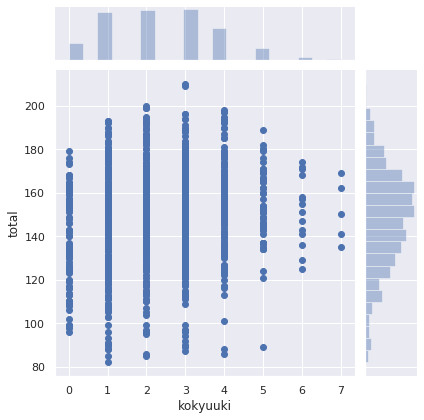

In [20]:
gps = dtt.groupby('kokyuuki').sum()
print(gps)
sns.jointplot('kokyuuki', 'total', data=dtt)

In [0]:

# LightGBM
import lightgbm as lgb
 
# Scikit-learn（評価算出）
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

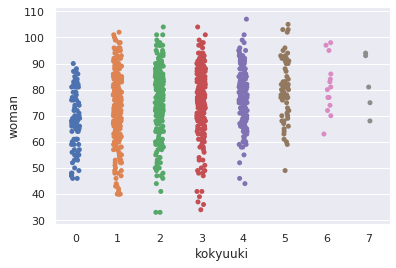

In [35]:
sns.stripplot(x="kokyuuki", y="woman", data=dtt)

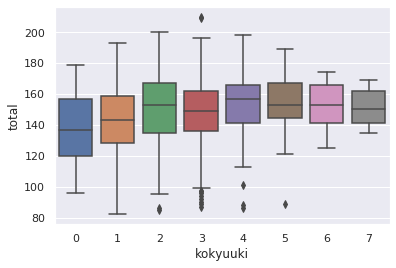

In [43]:
sns.boxplot(x="kokyuuki", y="total", data=dtt)

X_train.shape
(70, 3)
Y_train.shape
(70, 1)










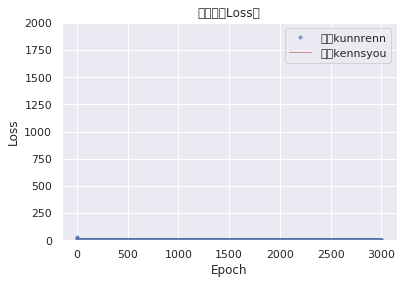

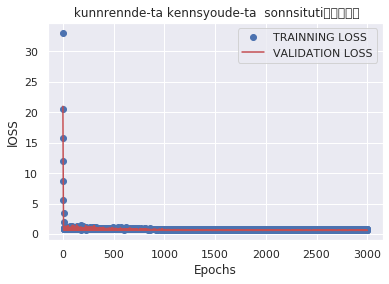

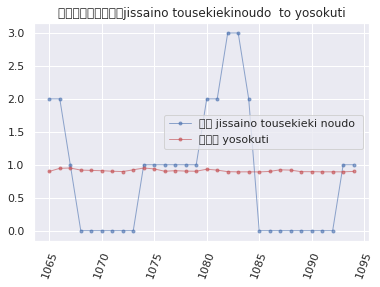

二乗平均平方根誤差（RMSE） : 0.936
30/30 [==============================] - 0s 174us/step
[0.768263041973114, 0.30000001192092896]


In [19]:

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



## エポック数
epochs = 3000

target = dtt["kokyuuki"].values
sentoral1 = dtt["total"].values
sentoral2 = dtt["man"].values
consoul1 = dtt["woman"].values

lookback = 3

def data_split(data, start, end, lookback,consoul1,sentoral1,sentoral2):
    length = abs(start-end)
    X = np.zeros((length, lookback))
    y = np.zeros((length, 1))
    
    for i in range(length):
        j = start - lookback + i
        k = j + lookback
        
        X[i] = consoul1[k]
        X[:,[1]]=sentoral1[k]
        X[:,[2]]=sentoral2[k]
        y[i] = data[k]
    return X, y

(X_train, y_train) = data_split(target, -100, -30, lookback,consoul1,sentoral1,sentoral2)

(X_valid, y_valid) = data_split(target, -60, -30, lookback,consoul1,sentoral1,sentoral2)
(X_test, y_test) = data_split(target, -30, 0, lookback,consoul1,sentoral1,sentoral2)

print("X_train.shape")
print(X_train.shape)
print("Y_train.shape")
print(y_train.shape)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))




model.compile(optimizer=RMSprop(), loss='mae', metrics=['accuracy'])


result = model.fit(X_train, y_train, 
                  verbose=0,   ## 詳細表示モード 
                  epochs=epochs, 
                  batch_size=64, 
                  shuffle=True, 
                  validation_data=(X_valid, y_valid))

## 訓練の損失値をプロット
epochs = range(len(result.history['loss']))
plt.title('損失値（Loss）')
plt.plot(epochs, result.history['loss'], 'bo', alpha=0.6, marker='.', label='訓練kunnrenn', linewidth=1)
plt.plot(epochs, result.history['val_loss'], 'r', alpha=0.6, label='検証kennsyou', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.ylim(0, 2000)
plt.show()


## 予測値
df_predict =  pd.DataFrame(model.predict(X_test), columns=['予測値yosokuti'])


## kunnrennde-ta kennsyoude-ta  sonnsitutiをプロット
history_dict = result.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values) + 1)
pre_date = df.index[-len(y_test):].values
plt.title(" kunnrennde-ta kennsyoude-ta  sonnsitutiをプロット")
plt.plot(epochs,loss_values,'bo',label='TRAINNING LOSS')
plt.plot(epochs,val_loss_values,'r',label='VALIDATION LOSS')
plt.xlabel('Epochs')
plt.ylabel('lOSS')
plt.legend()
plt.show()


## 予測結果をプロット
pre_date = df.index[-len(y_test):].values
plt.title("実際の終値と予測値jissaino tousekiekinoudo  to yosokuti")
plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="実際 jissaino tousekieki noudo ", linewidth=1)
plt.plot(pre_date, df_predict['予測値yosokuti'].values, 'r', alpha=0.6, marker='.', label="予測値 yosokuti", linewidth=1)
plt.xticks(rotation=70)
plt.legend()
plt.grid(True)
plt.show()

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(y_test, df_predict["予測値yosokuti"].values)))
results = model.evaluate(X_test,y_test)
print(results )




In [38]:
print("X_train.shape")
print(X_train.shape)
print("Y_train.shape")
print(y_train.shape)

lgb.LGBMClassifier()

# 訓練・テストデータの設定

lgb_train = lgb.Dataset(X_train, y_train)
print("lgb_train")
print(lgb_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
print("lgb_eval")
print(lgb_eval)


    # LightGBM のハイパーパラメータ
params = {
    'task' : 'train',
    'boosting_type' : 'gbdt',
    'objective' : 'regression',
    'metric' : {'l2', 'auc'},
    'num_leaves' : 31,
    'learning_rate' : 0.05,
    'feature_fraction' : 0.9,
    'bagging_fraction' : 0.8,
    'bagging_freq': 5,
    'verbose' : 0
}
 
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)


X_train.shape
(70, 3)
Y_train.shape
(70, 1)
lgb_train
lgb_eval


TypeError: ignored